In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import cv2
import os

In [ ]:
train = ImageDataGenerator(rescale=1./255,
      rotation_range=90,
      width_shift_range=0.2,                # Applaying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_data = train.flow_from_directory('F:\Datasetwbg2/train',
                                      target_size = (64,64),
                                      batch_size = 16,
                                      class_mode = 'categorical')

Found 275 images belonging to 5 classes.


In [ ]:
validation_dataset = train.flow_from_directory('F:\Datasetwbg2/test',
                                      target_size = (64,64),
                                      batch_size = 16,
                                      class_mode = 'categorical')

Found 68 images belonging to 5 classes.


In [ ]:
train_data.class_indices

{'Assassins Bug': 0, 'Bee': 1, 'Mosquito': 2, 'Moths': 3, 'Wasp': 4}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape=(64,64,3)),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),

                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   tf.keras.layers.Dense(5,activation = 'softmax'),
                                   ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             #optimizer = RMSprop(learning_rate = 0.001),
              optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
model_fit = model.fit(train_data,
                      #steps_per_epoch = 100,
                     epochs = 100,
                     validation_data = validation_dataset,
                     #callbacks=my_callbacks
                     )

Epoch 1/100
18/18 [==============================] - 23s 826ms/step - loss: 1.5756 - accuracy: 0.2945 - val_loss: 1.5100 - val_accuracy: 0.2794
Epoch 2/100
18/18 [==============================] - 2s 132ms/step - loss: 1.4753 - accuracy: 0.3636 - val_loss: 1.2731 - val_accuracy: 0.5000
Epoch 3/100
18/18 [==============================] - 2s 131ms/step - loss: 1.2933 - accuracy: 0.4764 - val_loss: 0.9273 - val_accuracy: 0.7500
Epoch 4/100
18/18 [==============================] - 2s 131ms/step - loss: 1.1413 - accuracy: 0.5527 - val_loss: 0.8508 - val_accuracy: 0.7059
Epoch 5/100
18/18 [==============================] - 2s 131ms/step - loss: 1.0766 - accuracy: 0.6000 - val_loss: 0.6272 - val_accuracy: 0.9118
Epoch 6/100
18/18 [==============================] - 2s 135ms/step - loss: 0.9121 - accuracy: 0.6436 - val_loss: 0.4122 - val_accuracy: 0.8824
Epoch 7/100
18/18 [==============================] - 2s 131ms/step - loss: 0.8825 - accuracy: 0.6764 - val_loss: 0.5961 - val_accuracy: 0.808

Epoch 58/100
18/18 [==============================] - 2s 134ms/step - loss: 0.3373 - accuracy: 0.8982 - val_loss: 0.2307 - val_accuracy: 0.9412
Epoch 59/100
18/18 [==============================] - 2s 128ms/step - loss: 0.2235 - accuracy: 0.9309 - val_loss: 0.1138 - val_accuracy: 0.9412
Epoch 60/100
18/18 [==============================] - 2s 133ms/step - loss: 0.3142 - accuracy: 0.9018 - val_loss: 0.1518 - val_accuracy: 0.9559
Epoch 61/100
18/18 [==============================] - 2s 130ms/step - loss: 0.2817 - accuracy: 0.8945 - val_loss: 0.1944 - val_accuracy: 0.9559
Epoch 62/100
18/18 [==============================] - 2s 133ms/step - loss: 0.1798 - accuracy: 0.9491 - val_loss: 0.1805 - val_accuracy: 0.9412
Epoch 63/100
18/18 [==============================] - 2s 132ms/step - loss: 0.1998 - accuracy: 0.9127 - val_loss: 0.1373 - val_accuracy: 0.9559
Epoch 64/100
18/18 [==============================] - 2s 135ms/step - loss: 0.1731 - accuracy: 0.9273 - val_loss: 0.1404 - val_accuracy:

In [ ]:
model.save('F:\\7april5classes.h5')

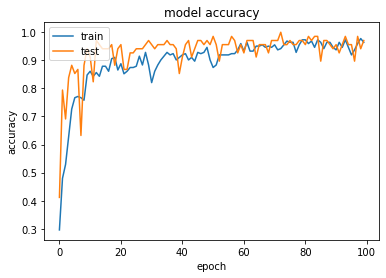

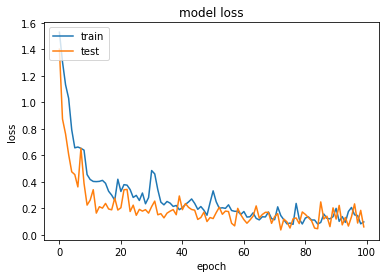

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
saved = load_model('F:\\7april5classes.h5')

In [ ]:
saved.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [ ]:
for i in range(100):
    try:
        img = image.load_img(f'F:\Datasetwbg2/train/Moths/Moths ({i}).png')
        print(f'F:\Datasetwbg2/train/Stink Bug/Assassinsbug ({i}).png')
        #img = image.load_img('F:\Datasetwbg2/train/Wasp/W00002-removebg-preview.png')
        #plt.imshow(img)
        #plt.show()
        img = img.resize((64,64))
        #plt.imshow(img)
        #plt.show()
        X = image.img_to_array(img)
        X = np.expand_dims(X,axis = 0)
        images = np.vstack([X])
        pred = saved.predict(images)
        print(pred)
        #print(max(pred[0]))
        # for i in pred[0]:
        #     print(str(i))
        #     if i ==1:
        #         print(train_data.class_indices.keys())
    except:
        pass

F:\Datasetwbg2/train/Stink Bug/Assassinsbug (1).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (2).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (3).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (4).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (5).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (6).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (7).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (8).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (9).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (10).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (11).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (12).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (13).png
[[0. 0. 0. 1. 0.]]
F:\Datasetwbg2/train/Stink Bug/Assassinsbug (14).png
[[0. 0. 0. 1. 0.]]
F

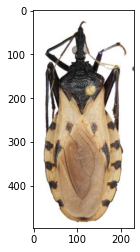

[[1. 0. 0. 0. 0.]]
<class 'numpy.float32'>


In [ ]:
img = image.load_img(r'F:\Datasetwbg2\train\Assassins Bug\Assassinsbug (37).png')
#img = image.load_img('F:\Datasetwbg2/train/Wasp/W00002-removebg-preview.png')
plt.imshow(img)
plt.show()
img = img.resize((64,64))
#plt.imshow(img)
#plt.show()
X = image.img_to_array(img)
X = np.expand_dims(X,axis = 0)
images = np.vstack([X])
pred = saved.predict(images)
print(pred)
print(type(pred[0][0]))
#print(max(pred[0]))
# for i in pred[0]:
#     print(str(i))
#     if i ==1:
#         print(train_data.class_indices.keys())

In [ ]:
train_data.class_indices

{'Assassins Bug': 0, 'Bee': 1, 'Mosquito': 2, 'Moths': 3, 'Wasp': 4}

In [ ]:
pred_list = list(pred[0])

In [ ]:
res = dict((v,k) for k,v in train_data.class_indices.items())

In [ ]:
act_pred = res[pred_list.index(max(pred_list))]

In [ ]:
import os
from twilio.rest import Client

# Find these values at https://twilio.com/user/account
# To set up environmental variables, see http://twil.io/secure
account_sid = ''
auth_token = ''

client = Client(account_sid, auth_token)

client.api.account.messages.create(
    to="",
    from_="",
    body="Culicidae(Mosquito) Detected By The System In Your Area.")

<Twilio.Api.V2010.MessageInstance account_sid=AC141d89f85e4b2cf9c1becd72d21358a2 sid=SM174de88cef0641d18f054c8ea8c9deed>

In [ ]:
import os

In [ ]:
os.mkdir("F:\\Dataset_PY")

In [ ]:
for i in os.listdir("F:\\Datasetwbg"):
    for j in os.listdir("F:\\Datasetwbg" + i):
